In [3]:
%matplotlib inline
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 3000)

In [4]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
trade_df = pd.read_csv('./data/Risk_Detection_Qualification/t_trade.csv', index_col='rowkey', 
                       parse_dates=['time'], date_parser=dateparse)
trade_test_df = pd.read_csv('./data/Risk_Detection_Qualification/t_trade_test.csv', index_col='rowkey',
                            parse_dates=['time'], date_parser=dateparse)
login_df = pd.read_csv('./data/Risk_Detection_Qualification/t_login.csv', index_col='log_id', 
                       parse_dates=['time'], date_parser=dateparse)
login_test_df = pd.read_csv('./data/Risk_Detection_Qualification/t_login_test.csv', index_col='log_id', 
                            parse_dates=['time'], date_parser=dateparse)
merged_login_df = login_df.append(login_test_df)
risk_id = trade_df[trade_df.is_risk==1]['id'].unique()
risk_login_df = merged_login_df[merged_login_df['id'].isin(risk_id)]
non_risk_login_df = merged_login_df[~(merged_login_df['id'].isin(risk_id))]

In [131]:
month_sub_trade_df = trade_df[trade_df.time>=np.datetime64('2015-06-10 00:00:00')]
month_sub_trade_df = month_sub_trade_df[month_sub_trade_df.time<np.datetime64('2015-06-20 00:00:00')]

month_sub_trade_df1 = trade_df[trade_df.time>=np.datetime64('2015-05-10 00:00:00')]
month_sub_trade_df1 = month_sub_trade_df1[month_sub_trade_df1.time<np.datetime64('2015-06-20 00:00:00')]

month_sub_trade_df = month_sub_trade_df.sort_values(by='time', ascending = True)
len(trade_test_df['id'].unique()), month_sub_trade_df.shape[0]

#.value_counts(normalize=True), month_sub_trade_df1['is_risk'].value_counts(normalize=True)

month_sub_trade_df[month_sub_trade_df['is_risk']==1]
# pd.DataFrame.hist(login_test_df, figsize = [15,15])

,time,id,is_risk
rowkey,,,
803683,2015-06-10 10:54:53,123545,1
804505,2015-06-10 13:08:31,143517,1
804526,2015-06-10 13:12:24,143517,1
804542,2015-06-10 13:14:24,143517,1
804562,2015-06-10 13:18:02,143517,1
804808,2015-06-10 13:57:59,143517,1
805320,2015-06-10 15:21:44,143517,1
805531,2015-06-10 15:58:14,31418,1
806210,2015-06-10 17:38:43,54973,1


In [ ]:
1731

In [117]:
test_outcomes_df = pd.read_csv('./data/submission/tested_outcomes_xgb_2017-11-23_10_55_54_0.43771_depth_13_learningrate_0.09_n_estimators_1200_subsample_0.9.csv', index_col='rowkey') 
actual_is_risk = test_outcomes_df.real_is_risk==1
actual_is_safe = test_outcomes_df.real_is_risk==0
predicted_notequal_real = test_outcomes_df.predicted_is_risk!=test_outcomes_df.real_is_risk
test_outcomes_df[actual_is_risk & predicted_notequal_real]
test_outcomes_df[actual_is_safe & predicted_notequal_real]

,id,predicted_is_risk,real_is_risk
rowkey,,,
737518,135995,1,0
744065,37531,1,0
751752,36574,1,0
751768,36574,1,0
754966,122509,1,0
767180,115110,1,0
774244,122509,1,0
774656,122509,1,0
774702,122509,1,0


In [158]:
later_than = trade_df.time>=np.datetime64('2015-05-01 00:00:00')
earlier_than = trade_df.time<np.datetime64('2015-06-01 00:00:00')
is_risk = trade_df['is_risk']==1
id_equal_5 = trade_df['id']==38375
month_sub_trade_df = trade_df[later_than & earlier_than & is_risk | ~id_equal_5].sort_values(by='time', ascending = True)
len(trade_test_df['id'].unique()), month_sub_trade_df.shape[0]
month_sub_trade_df.shape[0]

132709

In [132]:
# 得到一列不同的值
login_df['result'].unique()
login_df['id'].unique()
len(login_df['city'].unique()), len(login_df.index)
trade_df.count()
merged_login_df.dtypes
# trade_df[trade_df.is_scan==True].sort_values(by='time', ascending = True)  # 174422
trade_df[trade_df.id==125499].sort_values(by='time', ascending = True)  # 174422
# login_df.sort_values(by='time', ascending = True)  # 174422
# time_long_negative_df = merged_login_df[merged_login_df.timelong<0].sort_values(by='time', ascending = True)
# time_long_negative_df
# is_scan_false_df = merged_login_df[merged_login_df.is_scan==False].sort_values(by='time', ascending = True) 
# is_scan_false_df.to_csv('./data/is_scan_false.csv')
# is_scan_false_df['timelong'].max(), is_scan_false_df['timelong'].min()
# len(merged_login_df[merged_login_df.device==835072]['id'].unique())

,time,id,is_risk
rowkey,,,
277577,2015-02-23 11:10:51,125499,0
277578,2015-02-23 11:10:53,125499,0
355490,2015-03-09 10:36:32,125499,0
355508,2015-03-09 10:38:53,125499,0
871635,2015-06-18 02:43:43,125499,1
871696,2015-06-18 02:52:16,125499,1
871811,2015-06-18 03:17:28,125499,1
897178,2015-06-19 18:36:08,125499,0
913763,2015-06-22 17:02:25,125499,0


In [133]:
merged_login_df[merged_login_df.id==125499].sort_values(by='time', ascending = True)
#merged_login_df[merged_login_df.log_from==1].sort_values(by='time', ascending = True)
# merged_login_df.sort_values(by='time', ascending = True)
#merged_login_df[merged_login_df.device==835072].sort_values(by='time', ascending = True)
# merged_login_df[merged_login_df.ip==1256768].sort_values(by='time', ascending = True)
# merged_login_df[merged_login_df.city==238].sort_values(by='time', ascending = True)
# merged_login_df[merged_login_df.device==833972].sort_values(by='time', ascending = True)
# merged_login_df[merged_login_df.result==6].sort_values(by='time', ascending = True)
# merged_login_df[merged_login_df.timelong<0.0].sort_values(by='time', ascending = True)
# login_test_df[merged_login_df.device==1059981].sort_values(by='time', ascending = True)

,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
log_id,,,,,,,,,,,,
1.920943e+16,1520.0,274216,1,33615,430,-2,1.421434e+09,3,125499,False,False,2015-01-17 02:51:45
5.781994e+15,5.0,1522,10,1549364,63,1,1.422605e+09,1,125499,True,False,2015-01-30 16:06:02
5.427211e+15,2000.0,457174,2,1373611,194,1,1.423577e+09,3,125499,False,False,2015-02-10 22:10:08
4.055984e+15,6000.0,33383,2,955961,63,1,1.424438e+09,3,125499,False,False,2015-02-20 21:07:01
8.498665e+15,2000.0,835072,2,1560585,59,1,1.425382e+09,3,125499,False,False,2015-03-03 19:24:16
3.491040e+15,10018.0,815318,16,268738,455,1,1.425867e+09,3,125499,False,False,2015-03-09 10:16:45
3.556619e+16,6000.0,998912,2,268738,455,1,1.425868e+09,3,125499,False,False,2015-03-09 10:19:39
1.320978e+16,7000.0,998912,2,187258,63,1,1.425868e+09,3,125499,False,False,2015-03-09 10:21:52
3.189781e+16,3000.0,835072,2,375513,59,1,1.425888e+09,3,125499,False,False,2015-03-09 15:58:27


In [26]:
merged_login_df_new = merged_login_df.copy()
merged_login_df_new[merged_login_df_new.timelong<=0.0] = np.nan
merged_login_df_new['timelong'].fillna(merged_login_df_new['timelong'], )

In [144]:
merged_login_df['log_from'].unique().size
user_device_count = merged_login_df.groupby(['id', 'device']).size().to_frame().reset_index().groupby('id').size().to_frame().reset_index().rename(columns = {0: 'device_count'})
# user_device_count = merged_login_df.groupby(['id', 'device']).unique().size().to_frame().reset_index().groupby('id').size()
# user_device_count = merged_login_df.groupby(['id', 'device']).size().to_frame().reset_index()
# user_device_count = merged_login_df.groupby(['id']).size()
# user_device_count = merged_login_df.groupby('id').apply(lambda x: x.drop('id', axis=1).drop_duplicates().shape[0]).reset_index()
# user_device_count

[Float64Index([2.61836877304e+15, 9.96973876271e+14,   8.123343164e+15,
               3.26567709338e+14, 6.68465861522e+15, 8.82848128105e+15,
               6.07111941175e+15, 8.52517566418e+15, 3.12014507159e+15,
               5.36790457484e+15,
               ...
               9.13213191875e+14, 7.46396041967e+14, 4.81264669523e+16,
               3.49950306961e+15,  1.3325942479e+16, 5.69804532215e+15,
               9.91704139439e+15, 2.91044357034e+16, 2.16911852734e+16,
               4.30482755156e+14],
              dtype='float64', name='log_id', length=683393),
 Index(['timelong', 'device', 'log_from', 'ip', 'city', 'result', 'timestamp',
        'type', 'id', 'is_scan', 'is_sec', 'time'],
       dtype='object')]

显示某一列数值的分布情况

In [215]:
trade_df.shape, trade_df[trade_df['is_risk']==0].shape, trade_df[trade_df['is_risk']==1].shape
login_df.count()
#trade_df.is_risk.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
trade_df.is_risk.value_counts(normalize=True)
len(merged_login_df['device'].unique())
#login_df.is_sec.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
#login_test_df.is_sec.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
#login_test_df.info()

164532

In [25]:
trade_df_by_id = trade_df['is_risk'].groupby(trade_df['id'])

id_risk_trade   = trade_df[trade_df['is_risk']==1]['id']
id_nonrisk_trade = trade_df[trade_df['is_risk']==0]['id']
checked_id = set(id_risk) & set(id_nonrisk)
len(id_risk), len(id_nonrisk), len(checked_id)

(3643, 129076, 455)

In [147]:
login_df_by_id = login_df.groupby('id').count()
print(login_df_by_id)
#ratio = len(trade_df[trade_df['is_risk']==1])/len(trade_df)
#len(trade_df[trade_df['is_risk']==1]), len(trade_df)
# login_df['id']

        timelong  device  log_from    ip  city  result  timestamp  type  \
id                                                                        
5              4       4         4     4     4       4          4     4   
6              9       9         9     9     9       9          9     9   
13             2       2         2     2     2       2          2     2   
23             3       3         3     3     3       3          3     3   
25             2       2         2     2     2       2          2     2   
28             2       2         2     2     2       2          2     2   
37            20      20        20    20    20      20         20    20   
41            19      19        19    19    19      19         19    19   
52             5       5         5     5     5       5          5     5   
57             5       5         5     5     5       5          5     5   
73             1       1         1     1     1       1          1     1   
74            10      10 

显示trade_df和test_df中id的关系

In [177]:
login_id_set = set(login_df['id'])
login_test_id_set = set(login_test_df['id'])
trade_id_set = set(trade_df['id'])
trade_test_id_set = set(trade_test_df['id'])
trade_test_id_set < (login_test_id_set | login_id_set)
#len(trade_id_set), len(trade_test_id_set)
# set(merged_login_df['id']) == (trade_id_set | trade_test_id_set)
# set(merged_login_df['id']) > trade_id_set, login_id_set > trade_id_set

True

对比显示：对于有危险登录的id和没有危险登录的id，在历史登录记录中ip数量 city数量分布

In [156]:
risk_id = trade_df[trade_df.is_risk==1]['id'].unique()
len(risk_id)
ip_count = login_df[['ip', 'id']].groupby('id').count()
risk_ip_count = ip_count[ip_count.index.isin(risk_id)]
# risk_ip_count['ip'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
nonrisk_ip_count = ip_count[~(ip_count.index.isin(risk_id))]
nonrisk_ip_count['ip'].mean()
trade_test_df[trade_test_df.id.isin(risk_id)]
len(risk_id), list(risk_id)
#login_id_set

(1086,
 ['18138',
  '65489',
  '90970',
  '55986',
  '154625',
  '131624',
  '163711',
  '141236',
  '97238',
  '173999',
  '118753',
  '80396',
  '138243',
  '98286',
  '173410',
  '122113',
  '102090',
  '29224',
  '83331',
  '45779',
  '34225',
  '123981',
  '174435',
  '122223',
  '50477',
  '127540',
  '33748',
  '115114',
  '97310',
  '15525',
  '20682',
  '7134',
  '228',
  '123213',
  '149027',
  '52866',
  '111549',
  '55050',
  '40177',
  '141710',
  '20854',
  '65116',
  '19541',
  '107796',
  '92925',
  '153553',
  '175112',
  '125538',
  '130018',
  '38375',
  '32826',
  '84716',
  '167880',
  '109284',
  '60226',
  '75282',
  '80795',
  '127432',
  '43005',
  '81956',
  '109226',
  '5965',
  '135740',
  '76586',
  '81543',
  '72144',
  '99157',
  '92767',
  '108496',
  '101757',
  '119082',
  '15668',
  '85214',
  '140090',
  '58293',
  '137984',
  '82036',
  '92347',
  '10946',
  '175471',
  '98434',
  '104475',
  '101333',
  '84910',
  '53540',
  '111456',
  '148545',
 

显示某一个数值是否有同一ip多个帐号的情况

In [132]:
id_per_ip_count = login_df[['ip', 'id']].groupby('ip').count()
id_per_ip_count['id'].max()
id_per_ip_count.sort_values(by='id', ascending = False)

,id
ip,
359080,20408
847186,1737
1128532,871
1551343,813
1297757,467
877190,455
621905,384
451870,379
743802,331


显示device有不同id的情况

In [216]:
device_count = merged_login_df[['device', 'id']].groupby('device').count().sort_values(by='id', ascending = False)
device_count

,id
device,
835072,83636
225121,1096
926288,670
427691,590
215189,566
253357,564
511707,532
728381,516
274216,508


显示不同ip对应不同id的情况

In [220]:
ip_count = merged_login_df[['ip', 'id']].groupby('ip').count().sort_values(by='id', ascending = False)
ip_count

,id
ip,
359080,20408
847186,1737
1551343,950
1128532,871
451870,575
877190,545
1297757,490
1485916,470
621905,439


In [ ]:
对比显示risk_id和non_risk登录result分布情况

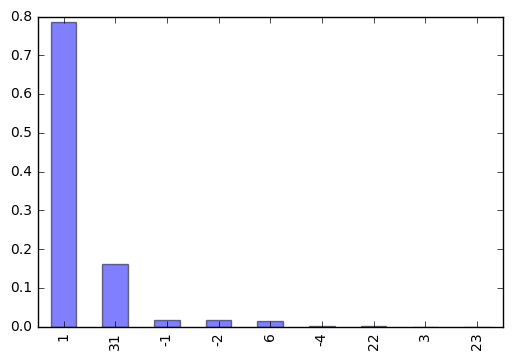

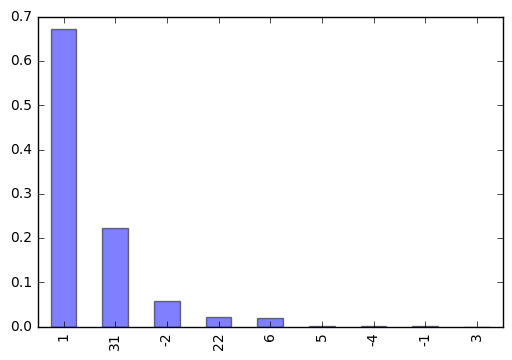

In [3]:
# result_count = merged_login_df['result'].value_counts(normalize=True)
non_risk_login_df['result'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.show()
risk_login_df['result'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.show()
# risk_ip_count = ip_count[ip_count.index.isin(risk_id)]
# risk_ip_count['ip'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
# nonrisk_ip_count = ip_count[~(ip_count.index.isin(risk_id))]

In [ ]:
对比显示risk_id和non_risk登录log_from分布情况

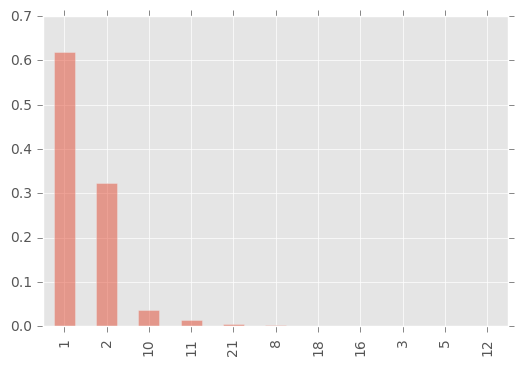

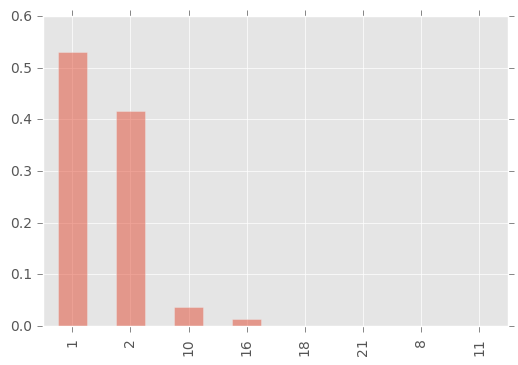

In [22]:

non_risk_login_df['log_from'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.show()
risk_login_df['log_from'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.show()

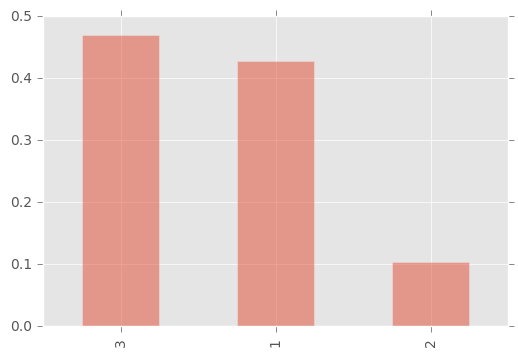

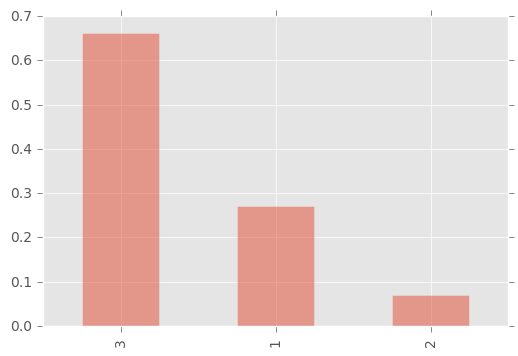

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001AF01B70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001D5490B8>]], dtype=object)

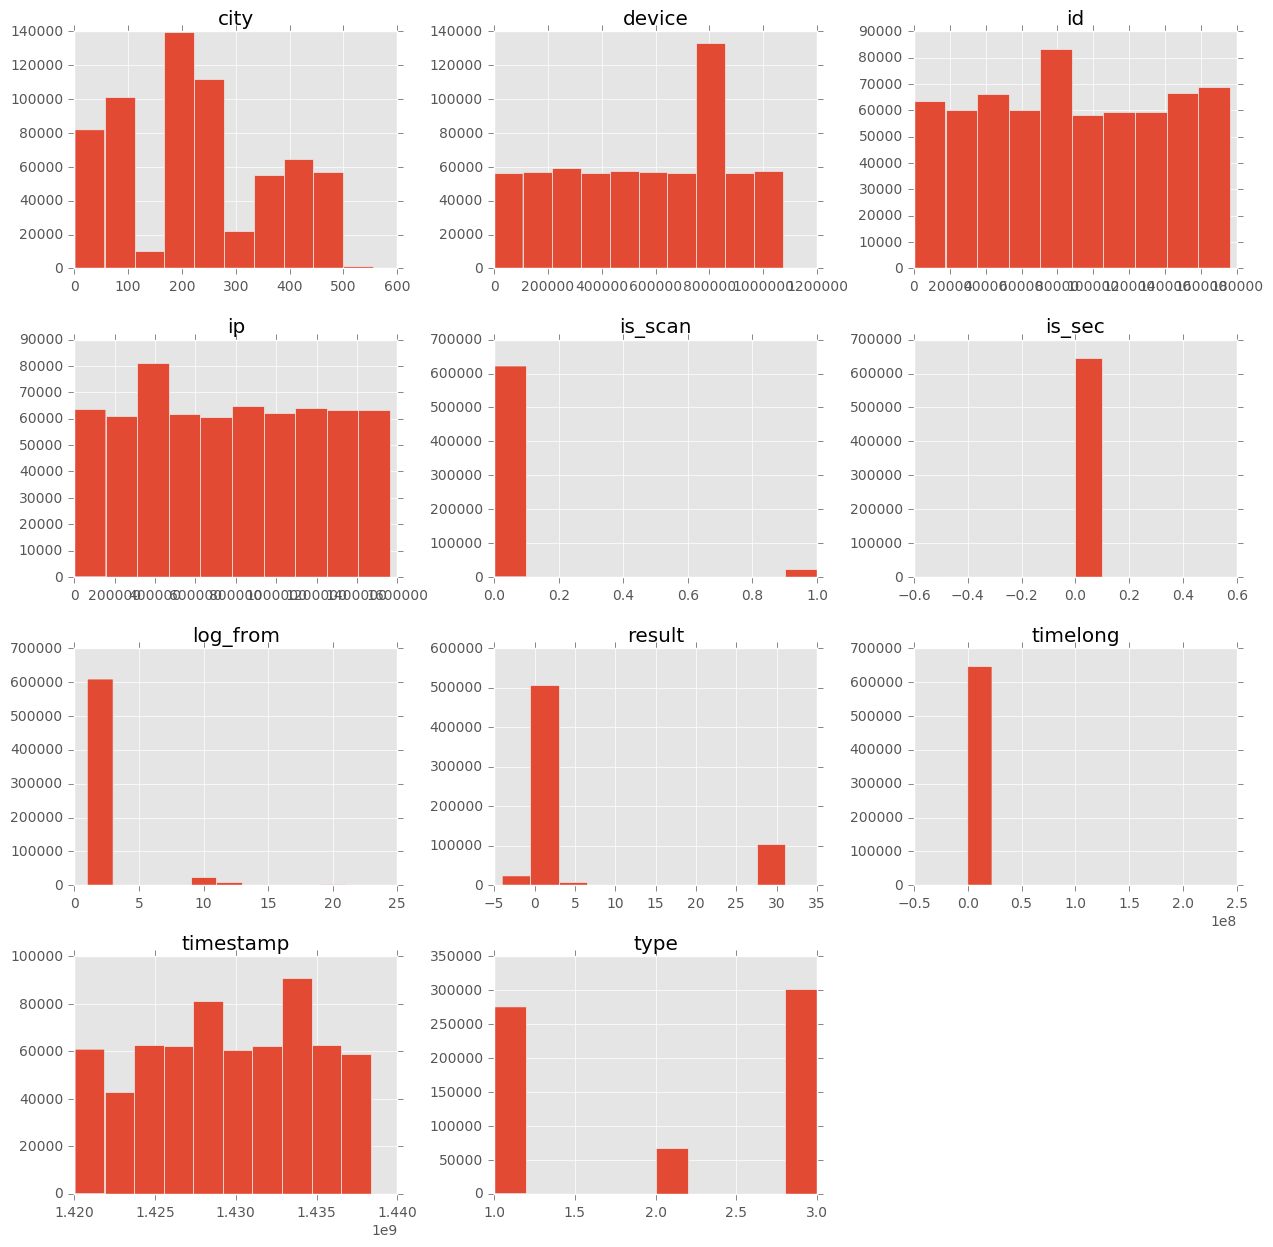

In [25]:
non_risk_login_df['type'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.show()
risk_login_df['type'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.show()
pd.DataFrame.hist(non_risk_login_df, figsize = [15,15])

In [337]:
id_count = trade_df['id'].groupby(trade_df['id']).count().sort_values(ascending = False)
id_count
#trade_df['result'].groupby(trade_df['id'])

id
54645     1095
49567      654
42908      566
74148      413
59055      367
54529      312
68595      282
97513      281
66294      258
115201     242
120335     241
92529      224
17557      220
36076      197
113760     182
165183     180
135767     146
101777     145
58635      144
83860      139
147174     135
96292      134
134720     128
39387      128
37279      127
123284     126
21283      122
115578     115
99470      111
38066      111
112171     108
151823     106
77170      105
154260     103
52893      102
120784     101
171345     101
78572      100
141674      98
95913       98
131113      96
135490      96
75425       94
23909       94
127282      94
122703      93
118933      92
132044      91
30346       91
79730       91
160524      91
158045      90
103902      87
130930      86
95458       85
85435       83
154650      83
126066      83
156796      82
58551       82
126810      82
37160       82
42197       81
141953      79
140111      79
73272       78
152127 

In [322]:
non_risk_login_df[non_risk_login_df.device==835072]
risk_login_df[risk_login_df.device==835072]

,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
log_id,,,,,,,,,,,,
1.934557e+16,6.0,835072,11,1067892,374,1,1.427953637E9,1,12653,False,False,2015-04-02 13:47:17
9.835055e+15,3621.0,835072,1,1203943,194,31,1.426594455E9,3,110346,False,False,2015-03-17 20:14:15
8.592159e+15,16447.0,835072,1,1506536,358,31,1.428831288E9,3,41428,False,False,2015-04-12 17:34:48
3.383243e+15,7000.0,835072,2,1069804,8,1,1.432343597E9,3,105035,False,False,2015-05-23 09:13:17
4.429197e+16,10000.0,835072,2,1069804,8,31,1.432343591E9,3,105035,False,False,2015-05-23 09:13:11
4.982060e+15,5736.0,835072,1,1463291,492,-2,1.428188221E9,3,9494,False,False,2015-04-05 06:57:01
1.684749e+15,2890.0,835072,1,1140840,492,31,1.42826994E9,3,24496,False,False,2015-04-06 05:39:00
2.913852e+16,4498.0,835072,1,604978,492,31,1.427824676E9,3,122960,False,False,2015-04-01 01:57:56
4.035165e+16,5121.0,835072,1,58475,194,1,1.424380063E9,3,114390,False,False,2015-02-20 05:07:43


In [460]:
def check_whether_same_day(time1, time2):
    time1 = pd.DatetimeIndex([time1])
    time2 = pd.DatetimeIndex([time2])
    year1, month1, day1 = time1.year[0], time1.month[0], time1.day[0]
    year2, month2, day2 = time2.year[0], time2.month[0], time2.day[0]
    print('year1 month1 day1 ', year1, month1, day1)
    print('year2 month2 day2 ', year2, month2, day2)
    same_day = (year1==year2 and month1==month2 and day1==day2)
    return 1 if same_day else 0

In [535]:
login_sub_df = merged_login_df.sort_values(by='time')
trade_time = login_sub_df['time'].values[29]
trade_time_1 = login_sub_df['time'].values[-10]

user_id = login_sub_df['id'].values[-10]

print('trade_time is ', trade_time, trade_time_1)
year = pd.DatetimeIndex([trade_time]).year[0]
month = pd.DatetimeIndex([trade_time]).month[0]
day = pd.DatetimeIndex([trade_time]).day[0]

print('check_whether_same_day is ', check_whether_same_day(trade_time, trade_time_1))

train_df = pd.read_csv('./data/train_data.csv', index_col='rowkey')

trade_time is  2015-01-01T00:14:13.000000000 2015-07-31T23:57:36.000000000
year1 month1 day1  2015 1 1
year2 month2 day2  2015 7 31
check_whether_same_day is  0


In [ ]:
判断一天之中某个时间段内登录是否为risk的概率比较大

In [644]:
trade_new_df = pd.read_csv('./data/Risk_Detection_Qualification/t_trade.csv', 
                           index_col='rowkey', parse_dates=['time'], 
                           date_parser=dateparse)
time_series = pd.DatetimeIndex(trade_new_df['time'])
trade_new_df['hour'] = time_series.hour
trade_new_df['minute'] = time_series.minute

sub_trade_new_df = trade_new_df.copy()
sub_trade_new_df = sub_trade_new_df[sub_trade_new_df.hour>=1] 
sub_trade_new_df = sub_trade_new_df[sub_trade_new_df.hour<=7]


def get_ratio(hour_start, hour_end):
    global trade_new_df
    sub_trade_new_df = trade_new_df.copy()
    sub_trade_new_df = sub_trade_new_df[sub_trade_new_df.hour>=hour_start] 
    sub_trade_new_df = sub_trade_new_df[sub_trade_new_df.hour<=hour_end]
    print(sub_trade_new_df['is_risk'].value_counts(normalize=True), 
          'len is ', sub_trade_new_df[sub_trade_new_df.is_risk==1].shape[0])

sub_trade_new_df.shape[0], trade_new_df.shape[0]
get_ratio(6, 7)
print('all day long is: ', trade_new_df['is_risk'].value_counts(normalize=True), 'len is ', trade_new_df[trade_new_df.is_risk==1].shape[0])


0    0.961576
1    0.038424
Name: is_risk, dtype: float64 len is  156
all day long is:  0    0.972551
1    0.027449
Name: is_risk, dtype: float64 len is  3643


In [72]:
df_df = pd.DataFrame({'A': ['one', 'two', 'one', 'three', 'two', 'three'],
                      'B': ['one1', 'two1', 'one1', 'one1', 'two1', 'one1'],
                      'C': [2, 4, 9, 10, 15, 21],
                      'D': [4, 5, 6, 9, 45, 27]})

df_df.drop('B', axis=1, inplace=True)
df_df

,A,C,D
0,one,2,4
1,two,4,5
2,one,9,6
3,three,10,9
4,two,15,45
5,three,21,27


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000005E10EB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011C8D5F8>]], dtype=object)

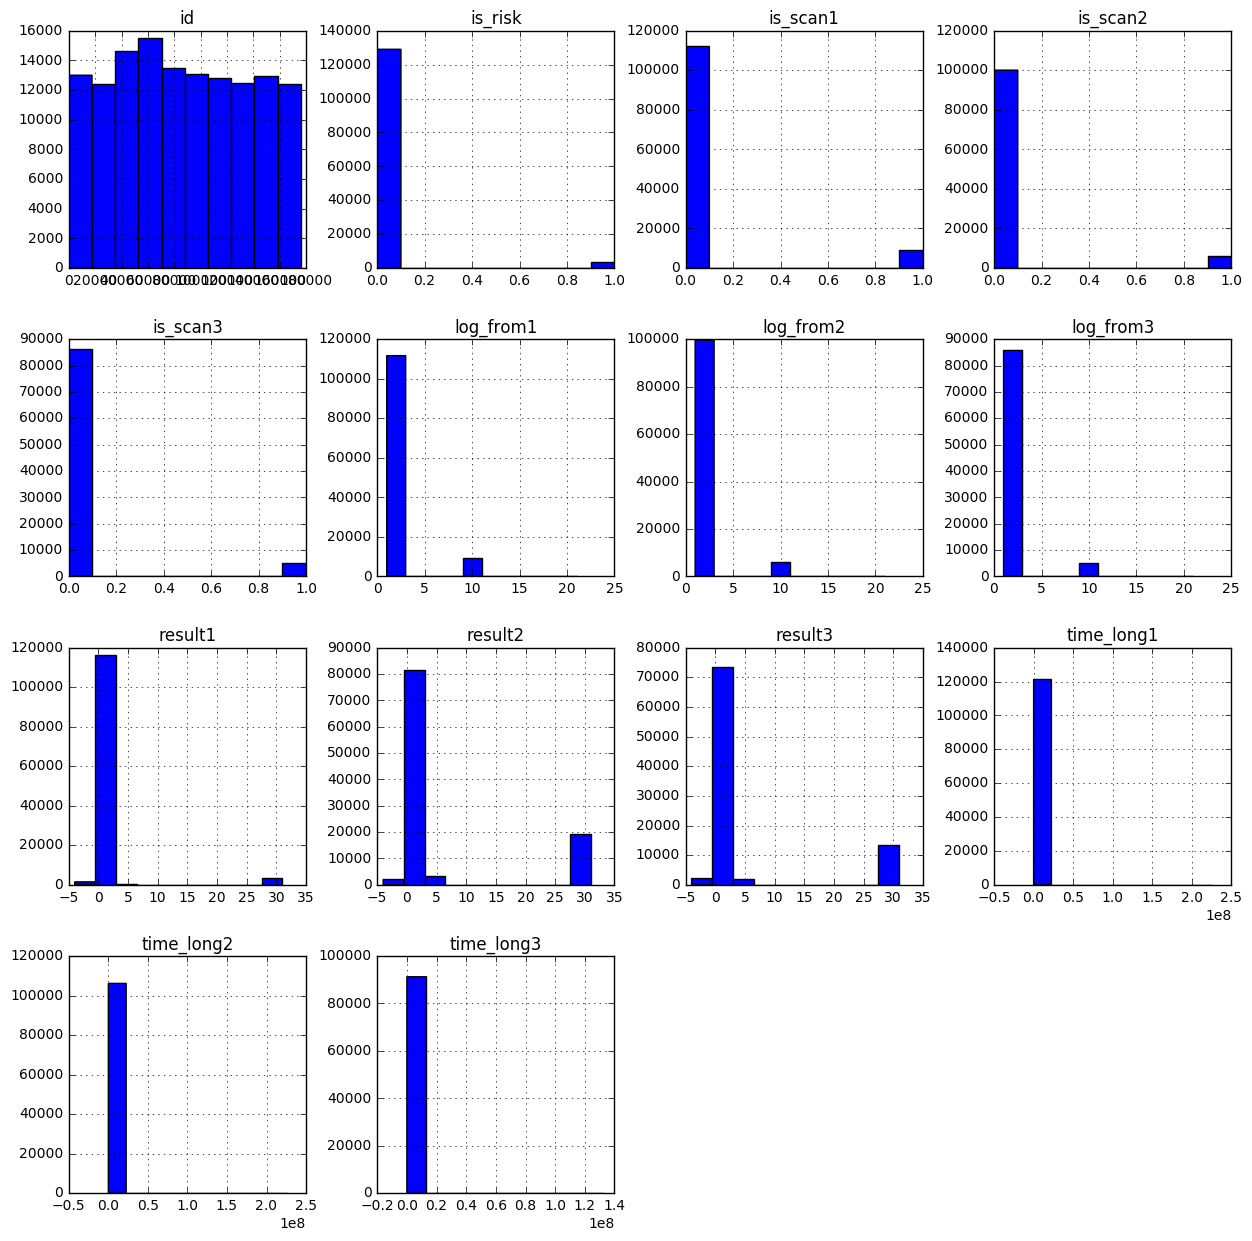

In [20]:
#train_df = pd.read_csv('./data/train_data.csv', index_col='rowkey')
last3_login_info_df = pd.read_csv('./features/train/last3_login_info.csv', index_col='rowkey')
login_result_value_count = last3_login_info_df['result1'].value_counts(dropna=False)
is_risk_login = last3_login_info_df[last3_login_info_df.is_risk==1]
risk_result_value_counts = is_risk_login['result1'].value_counts(dropna=False)
# risk_result_value_counts, login_result_value_count
# (risk_result_value_counts/login_result_value_count).plot(kind='bar', alpha=0.5)
pd.DataFrame.hist(last3_login_info_df, figsize = [15,15])


#test_outcomes_df = pd.read_csv('./data/submission/test_predicted_outcomes.csv', index_col='rowkey')

In [88]:
train_df[train_df.ty==24445]
test_outcomes_df.where(test_outcomes_df.is_risk==1)

,predicted_risk,is_risk,id
rowkey,,,
944052,0,1,24445


In [77]:
predicted_test_df = pd.read_csv('./data/submission/tested_outcomes.csv')[['rowkey', 'predicted_is_risk']]
real_test_df = pd.read_csv('./data/submission/real_test_df.csv')

In [78]:
predicted_test_df['right'] =  (predicted_test_df['predicted_is_risk'].values==real_test_df['is_risk'].values)
#predicted_test_df
#real_test_df

In [84]:
predicted_test_df[predicted_test_df.right==False]

,rowkey,predicted_is_risk,right
66,736926,0,False
149,737666,0,False
418,739661,0,False
913,743546,0,False
934,743721,0,False
978,744065,1,False
1103,744925,0,False
1145,745188,0,False
1146,745191,0,False
1150,745225,0,False


In [91]:
trade_test_df.loc[1103:]

,time,id
rowkey,,
1108,2015-07-01 10:07:29,65015
1110,2015-07-01 10:07:34,93524
1121,2015-07-01 10:09:29,78461
1124,2015-07-01 10:10:02,175766
1131,2015-07-01 10:10:29,80477
1133,2015-07-01 10:10:44,84443
1146,2015-07-01 10:12:36,84443
1165,2015-07-01 10:14:22,36855
1179,2015-07-01 10:15:58,135767
